# Convolutional Neural Network

### Importing the libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dog Image Classifier/Dataset/train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1254 images belonging to 2 classes.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
training_set.class_indices

{'healthydog': 0, 'unhealthydog': 1}

### Preprocessing the Test set

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dog Image Classifier/Dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 420 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [14]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

# 1st dense layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# 2nd dense layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 50)

Epoch 1/50
 3/40 [=>............................] - ETA: 55s - loss: 0.5532 - accuracy: 0.8854 

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 [==============================] - 358s 9s/step - loss: 0.4676 - accuracy: 0.8349 - val_loss: 0.4337 - val_accuracy: 0.8333
Epoch 2/50
40/40 [==============================] - 47s 1s/step - loss: 0.4058 - accuracy: 0.8349 - val_loss: 0.5207 - val_accuracy: 0.8333
Epoch 3/50
40/40 [==============================] - 46s 1s/step - loss: 0.3997 - accuracy: 0.8349 - val_loss: 0.4404 - val_accuracy: 0.8333
Epoch 4/50
40/40 [==============================] - 47s 1s/step - loss: 0.3667 - accuracy: 0.8349 - val_loss: 0.4067 - val_accuracy: 0.8333
Epoch 5/50
40/40 [==============================] - 47s 1s/step - loss: 0.3589 - accuracy: 0.8349 - val_loss: 0.3727 - val_accuracy: 0.8333
Epoch 6/50
40/40 [==============================] - 47s 1s/step - loss: 0.3535 - accuracy: 0.8349 - val_loss: 0.3733 - val_accuracy: 0.8357
Epoch 7/50
40/40 [==============================] - 46s 1s/step - loss: 0.3453 - accuracy: 0.8413 - val_loss: 0.3966 - val_accuracy: 0.8405
Epoch 8/50
40/40 [============

## Part 4 - Making a single prediction

# saving the model

In [20]:
cnn.save("/content/drive/MyDrive/Dog Image Classifier/cnn.dense4_conv4")
print("Saved model to disk")

Saved model to disk


# loading the model

In [21]:
from numpy import loadtxt
from keras.models import load_model


# load model
cnn = load_model('/content/drive/MyDrive/Dog Image Classifier/cnn.dense4_conv4')
# summarize model.
cnn.summary()

# split into input and output variables

# evaluate the model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [22]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [23]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dog Image Classifier/Dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 420 images belonging to 2 classes.


In [24]:
import numpy as np

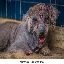

In [25]:
#@title Default title text
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Dog Image Classifier/Dataset/single_prediction/33 (1).jpg', target_size = (64, 64))
test_image

In [26]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] == 0:
  prediction = "None"
elif result[0][0] <= 0.5:
  prediction = 'Healthy'
else:
  prediction = 'Unhealthy'

1/1 [==============================] - 0s 151ms/step


In [27]:
print(prediction)

Unhealthy


In [28]:
result[0][0]

0.9999864